In [40]:
import numpy as np # linear algebra
import pandas as pd

In [41]:
df = pd.read_csv(r"C:\Users\Yash Agarwal\Desktop\Datasets\loan_clean_final.csv")

In [42]:
df.shape

(1048575, 34)

In [43]:
df['loan_status_bin'].value_counts()

0    833009
1    215566
Name: loan_status_bin, dtype: int64

In [44]:
df.head(1)

,no,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,annual_inc,delinq_2yrs,open_acc,...,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,initial_list_status_w
0,100,30000,30000,30000.0,22.35,1151.16,4,100000.0,0,11,...,1,0,0,1,0,0,0,0,0,1


In [45]:
df=df.drop(['no'],axis=1)

In [46]:
df.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,annual_inc,delinq_2yrs,open_acc,pub_rec,...,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,initial_list_status_w
0,30000,30000,30000.0,22.35,1151.16,4,100000.0,0,11,1,...,1,0,0,1,0,0,0,0,0,1


In [47]:
columns=df.columns.tolist()

In [48]:
Y=df['loan_status_bin']

In [49]:
X=df.drop(['loan_status_bin'],axis=1)
X.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,annual_inc,delinq_2yrs,open_acc,pub_rec,...,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,initial_list_status_w
0,30000,30000,30000.0,22.35,1151.16,4,100000.0,0,11,1,...,1,0,0,1,0,0,0,0,0,1


In [50]:
print("X",X.shape)
print("Y",Y.shape)

X (1048575, 32)
Y (1048575,)


In [51]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

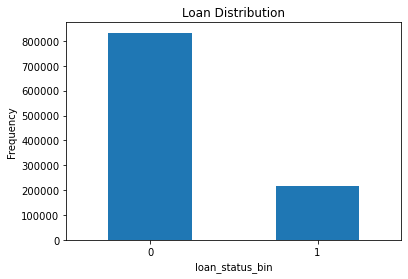

In [52]:
count_default=pd.value_counts(df['loan_status_bin'],sort=True)
count_default.plot(kind='bar',rot=0)
plt.title("Loan Distribution")
plt.xlabel("loan_status_bin")
plt.ylabel("Frequency")

In [53]:
normal=df[df['loan_status_bin']==0]
default=df[df['loan_status_bin']==1]
print(normal.shape,default.shape)

(833009, 33) (215566, 33)


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [56]:
print(x_train.shape,x_test.shape)

(734002, 32) (314573, 32)


In [19]:
#x_train = x_train.sample(frac=0.45,random_state=2)
#y_train = y_train.sample(frac=0.45,random_state=2)

In [57]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(734002, 32) (734002,) (314573, 32) (314573,)


In [58]:
print('Original dataset{}'.format(Counter(y_train)))

Original datasetCounter({0: 583056, 1: 150946})


In [59]:
from collections import Counter
print('Original dataset{}'.format(Counter(y_train)))

Original datasetCounter({0: 583056, 1: 150946})


In [60]:
from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import NearMiss 

In [61]:
import datetime
start=datetime.datetime.now()

smote=SMOTETomek(random_state=27)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

stop=datetime.datetime.now()

execution_time=stop-start
print("execution_time",execution_time)

execution_time 0:25:59.173680


In [92]:
print(x_train.shape,x_train_smote.shape,y_train_smote.shape)

(734002, 32) (1165536, 32) (1165536,)


In [93]:
print('Original dataset{}'.format(Counter(y_train)))
print('Resampled dataset{}'.format(Counter(y_train_smote)))

Original datasetCounter({0: 583056, 1: 150946})
Resampled datasetCounter({0: 582768, 1: 582768})


# LGB

In [94]:
import lightgbm as lgb

In [95]:
d_train=lgb.Dataset(x_train_smote,label=y_train_smote)

In [96]:
params={'learning_rate':0.05,'boosting_type':'gbdt','objective':'binary',
        'metric':['auc','binary_logloss'],'num_leaves':100,'max_depth':10}

In [97]:
clf=lgb.train(params,d_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 582768, number of negative: 582768
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3037
[LightGBM] [Info] Number of data points in the train set: 1165536, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [98]:
y_pred_lgb=clf.predict(x_test)

In [99]:
y_pred_lgb

array([0.00665536, 0.00516615, 0.00588073, ..., 0.00495824, 0.99671806,
       0.00420314])

In [100]:
for i in range(0,x_test.shape[0]):
    if y_pred_lgb[i]>=0.5:
        y_pred_lgb[i]=1
    else:
        y_pred_lgb[i]=0

In [101]:
y_pred_lgb

array([0., 0., 0., ..., 0., 1., 0.])

In [102]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score

In [103]:
print(confusion_matrix(y_test,y_pred_lgb))
cm_lgb=confusion_matrix(y_test,y_pred_lgb)

[[249949      4]
 [   264  64356]]


<AxesSubplot:>

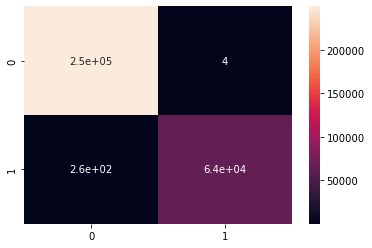

In [104]:
import seaborn as sns
sns.heatmap(cm_lgb,annot=True)

In [105]:
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
# Plotting Precision-Recall Curve
# disp = plot_precision_recall_curve(clf, x_test, y_test)

Precision:  0.9999378495960224
Recall:  0.9959145775301764


In [106]:
metrics.roc_auc_score(y_test, y_pred_lgb)

0.9979492872608055

In [107]:
print(f1_score(y_test,y_pred_lgb))

0.9979221584741821
